# Explicit Time Integration Workbook: Cooking a Lobster
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

When cooking a Lobster, one can choose a traditional oven or using a pot with boiling water. Find out which method of cooking will cook the lobster faster assuming the lobster needs to cook at 100 C (374K) for 12 mins for a 1kg lobster.
Assumptions:
* The lobster remains at a uniform temperature.  This implies that the thermal conductivity of the lobster is “large”.  This is likely a poor assumption!
* The lobster is a cylinder with length L and radius r.
* The lobster’s mass remains constant with time (reasonable assumption)
* The heat capacity of the lobster is approximately that of water (questionable, but reasonable assumption).

Consider then a lobster of length $L = 0.3$ m, and a mass $m = 1$ kg. The Lobster is approximated as a cylinder of radius $r = 0.1$ m. The total surface area of the lobster is then $ A = 2\pi r L + 2 \pi r^2$. The heat capacity of the lobster is that of water, $c_p = 4200$ J/kg/K.

### Cooking in Boiling Water
Cooking in boiling water is akin to a convective heat transfer problem. The governing equation in this case for the temperature in the Lobster is
\begin{equation}
\frac{\text{d}T}{\text{d}t} = -\frac{h A}{m c_p} (T - T_\infty)
\end{equation}
whhere $h = 500$ J/m/m/s is the convective heat transfer coefficient and $T_\infty = 374$ is the temperature of boiling water (the surrounding temperature of the Lobster). So, we boil the water and put the Lobster in it and watch how the Lobster's temperature rises.

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [32]:
L = 0.3 # m
r = 0.1 # m
A = 2.0*np.pi*r*L + 2.0*np.pi*r*r # m2
m = 0.5 # kg
cp = 4200 # J/kg/K

In [36]:
def rhs_conv(T, time):
    h = 100 # J/m2/s
    Tinf = 373 # K boiling temp of water
    rhs = - h * A/m/cp * (T - Tinf)
    return rhs

In [37]:
def rhs_rad(T, time):
    σ = 5.6704e-8 # J/m2/k/s
    ϵ = 1.0
    Tinf = 550
    rhs  = - σ * ϵ * A / m / cp * (T**4 - Tinf**4)
    return rhs

# Using Python's `odeint`

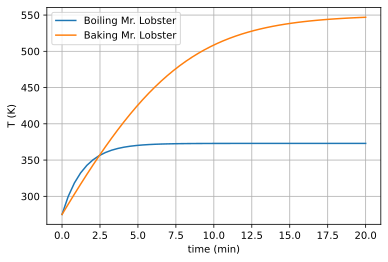

In [39]:
from scipy.integrate import odeint
tend = 20 * 60
time = np.linspace(0,tend)
T0 = 275
Tconv = odeint(rhs_conv,T0,time)
Trad = odeint(rhs_rad,T0,time)
plt.plot(time/60,Tconv,label='Boiling Mr. Lobster')
plt.plot(time/60,Trad,label='Baking Mr. Lobster')
plt.xlabel('time (min)')
plt.ylabel('T (K)')
plt.legend()
plt.grid()
# plt.savefig('lobster temperature.pdf')

## Pass Params to RHS

In [45]:
def rhs_conv1(T, time, h, Tinf):
    L = 0.3 # m
    r = 0.1 # m
    A = 2.0 * np.pi * r * L + 2.0 * np.pi * r * r # m2
    m = 1.0 # kg
    cp = 4200 # J/kg/K 
    rhs = - h * A / m / cp * (T - Tinf)
    return rhs

In [46]:
def rhs_rad1(T, time, Tinf):
    σ = 5.6704e-8 # W/m2/k4
    ϵ = 1.0
    m = 1.0 # kg
    cp = 4200 # J/kg/K
    L = 0.3 # m
    r = 0.1 # m
    A = 2.0 * np.pi * r * L + 2.0 * np.pi * r * r # m2
    rhs  = - σ * ϵ * A/m / cp*(T**4 - Tinf**4)
    return rhs

In [50]:
from scipy.integrate import odeint
tend = 60 * 60
time = np.linspace(0,tend)
T0 = 275

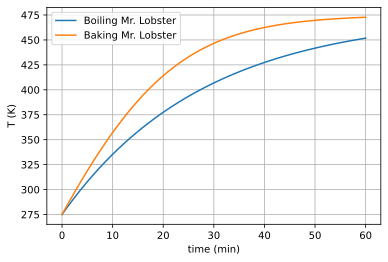

In [52]:
h = 10
Tinf = 475
TinfOven = 475
Tconv = odeint(rhs_conv1,T0, time, args=(h,Tinf))
Trad = odeint(rhs_rad1,T0, time, args=(TinfOven,))
plt.plot(time/60,Tconv,label='Boiling Mr. Lobster')
plt.plot(time/60,Trad,label='Baking Mr. Lobster')
plt.xlabel('time (min)')
plt.ylabel('T (K)')
plt.legend()
plt.grid()
# plt.savefig('lobster temperature.pdf')

# Using our own Integrator

In [47]:
def forward_euler(rhs, f0, t):
    # fn+1 = fn + dt*rhs
    nsteps = len(t)
    dt = t[1]-t[0] # assume that dt=constant. what if dt is not?
    f = np.zeros(nsteps)
    f[0] = f0
    for n in np.arange(nsteps-1):
        f[n+1] = f[n] + dt * rhs(f[n], t[n])
    return f

In [58]:
tend = 60 * 60 # 20 minutes x 60 seconds/minute
dt = 100
nsteps = int(tend/dt)
time = np.linspace(0,tend,nsteps)
T0 = 311
Tconv = forward_euler(rhs_conv,T0,time)
Trad  = forward_euler(rhs_rad ,T0,time)

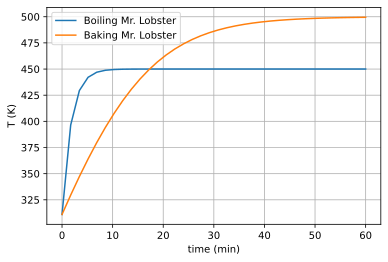

In [59]:
plt.plot(time/60,Tconv,label='Boiling Mr. Lobster')
plt.plot(time/60,Trad,label='Baking Mr. Lobster')
plt.xlabel('time (min)')
plt.ylabel('T (K)')
plt.legend()
plt.grid()

# Interactive

In [24]:
def plot_lobster_temps(h,TinfConv,TinfRad):
    Tconv = odeint(rhs_conv1,T0, time, args=(h,TinfConv))
    Trad = odeint(rhs_rad1,T0, time, args=(TinfRad,))
    plt.plot(time/60,Tconv,label='Boiling Mr. Lobster')
    plt.plot(time/60,Trad,label='Baking Mr. Lobster')
    plt.xlabel('time (s)')
    plt.ylabel('T (K)')
    plt.legend()
    plt.grid()

In [25]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy.integrate import odeint
h = widgets.FloatSlider(value=100,min=0.01,max=10000,step=10,description='h:',continuous_update=False)
style = {'description_width': 'initial'}
TinfConv = widgets.FloatSlider(value=350,min=350,max=600,step=10, description='$T_\infty$:' ,style=style,continuous_update=False)
TinfRad = widgets.FloatSlider(value=350,min=170,max=600.0,step=10,description='$T_{\infty,\mathrm{rad}}$:',readout_format='.3f',style=style,continuous_update=False)

ui1 = widgets.HBox([h,TinfConv])
ui2 = widgets.HBox([TinfRad])

out = widgets.interactive_output(plot_lobster_temps, {'h': h, 'TinfConv': TinfConv, 'TinfRad': TinfRad})

display(ui1,ui2, out)

Output()